<a href="https://colab.research.google.com/github/akemiyamashita/Trainable_Segmentation/blob/master/wmv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ROOT_DIR = '/content'
SRC_DIR= '/content/gdrive/My Drive/医療情報ゼミ/'

In [0]:
import shutil
import os
import cv2

import numpy as np

import matplotlib.pyplot as plt

from IPython.display import Image
from PIL import Image as Im

In [0]:
cap = cv2.VideoCapture('/content/Case2 (40).wmv')
fps    = cap.get(cv2.CAP_PROP_FPS)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

# 書き出し先　形式はMP4Vを指定
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv2.VideoWriter("/content/Case2 (40).m4v",int(fourcc), fps, (int(width), int(height)))

while(cap.isOpened()):
	try:
		ret, frame = cap.read()
		out.write(frame)
		cv2.imshow('frame',frame)
		if cv2.waitKey(1) & 0xFF == ord('q'):
			break
	except:
		break

out.release()
cap.release()
cv2.destroyAllWindows()

In [0]:
def save_frame_range(video_path, start_frame, stop_frame, step_frame,
                     dir_path, basename, ext='jpg'):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    for n in range(start_frame, stop_frame, step_frame):
        cap.set(cv2.CAP_PROP_POS_FRAMES, n)
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), frame)
        else:
            return

save_frame_range('data/temp/sample_video.mp4',
                 200, 300, 10,
                 'data/temp/result_range', 'sample_video_img')

In [0]:
if not os.path.exists('/content/img_data'):
  os.makedirs('/content/img_data')

In [0]:
save_frame_range('/content/Case2 (40).m4v',0,4000,1,'/content/img_data','video_img')

In [0]:
img = cv2.imread('/content/img_data/video_img_0.jpg')

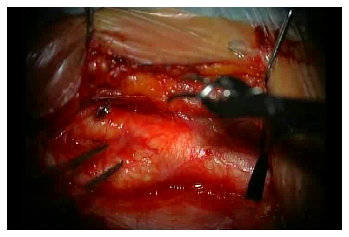

In [0]:
color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(6, 6))
axes.imshow(color_img)
axes.axis('off')
plt.show()

In [7]:
shutil.copy('/content/gdrive/My Drive/医療情報ゼミ/Case2 raw.mpg',ROOT_DIR)

'/content/Case2 raw.mpg'

In [8]:
!pip install ffmpy

  Created wheel for ffmpy: filename=ffmpy-0.2.2-cp36-none-any.whl size=4601 sha256=321ee8b46b7e589e8220f94804c89839d1ae8cf2638a1f6974c216d02066980d
  Stored in directory: /root/.cache/pip/wheels/16/28/57/96aff0d874198125b03f542d854e7ebdc61a56b09a4d49de6a
Successfully built ffmpy


In [0]:
import ffmpy

In [0]:
ff = ffmpy.FFmpeg(
     inputs ={'/content/Case2 raw.mpg':None},
     outputs ={'/content/output.mp4':None}
     )

In [11]:
ff.run()

(None, None)

In [0]:
save_frame_range('/content/output.mp4',0,10000000,100,'/content/img_data','video_img')

In [0]:
img = cv2.imread('/content/img_data/video_img_051000.jpg')

200000


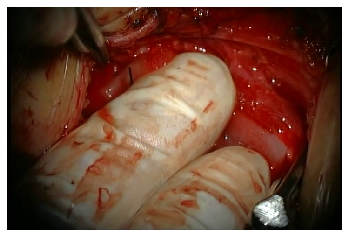

In [24]:
img_num = input()
img_path = '/content/img_data/video_img_' + img_num + '.jpg'
img = cv2.imread(img_path)
color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
ig, axes = plt.subplots(figsize=(6, 6))
axes.imshow(color_img)
axes.axis('off')
plt.show()

In [25]:
print(img.shape)

(480, 720, 3)


In [0]:
img_path = '/content/img_data/video_img_077700.jpg'

In [0]:
src = cv2.imread(img_path)

def skin_detect(src):
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

    hsv_min = np.array([0, 30, 60])
    hsv_max = np.array([20, 150, 255])
    mask = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask

def mosaic(src, ratio=2.0):
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

def mosaic_area(src, x, y, width, height, ratio=0.1):
    dst = src.copy()
    dst[y:y + height , x:x + width] = mosaic(dst[y:y + height, x:x + width], ratio)
    return dst

if __name__ == "__main__":
    mask = skin_detect(src)
    result1 = mosaic(src)
    result2 = mosaic_area(src, 100, 100, 200, 200)

    cv2.imwrite("result1.jpg", result1)
    cv2.imwrite("result2.jpg", result2)

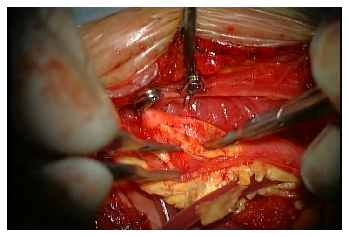

In [50]:
img = cv2.imread(img_path)
color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
fig, axes = plt.subplots(figsize=(6, 6))
axes.imshow(color_img)
axes.axis('off')
plt.show()

In [0]:
img = cv2.imread(img_path)
axes.imshow(img)
axes.axis('off')
plt.show()

0<= H < 360 (単位 °) 色相 
0<= S <= 100　(単位 %) 彩度
0<= V <= 100 (単位 %) 明度

In [0]:
# 赤色の検出
def detect_red_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 赤色のHSVの値域1
    hsv_min = np.array([0,30,60])
    hsv_max = np.array([20,150,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
    hsv_min = np.array([150,64,0])
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色領域のマスク（255：赤色、0：赤色以外）    
    mask = mask1 + mask2

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img

# 緑色の検出
def detect_green_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 緑色のHSVの値域1
    hsv_min = np.array([30, 64, 0])
    hsv_max = np.array([90,255,255])

    # 緑色領域のマスク（255：赤色、0：赤色以外）    
    mask = cv2.inRange(hsv, hsv_min, hsv_max)
    
    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img

# 青色の検出
def detect_blue_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 青色のHSVの値域1
    hsv_min = np.array([90, 64, 0])
    hsv_max = np.array([150,255,255])

    # 青色領域のマスク（255：赤色、0：赤色以外）    
    mask = cv2.inRange(hsv, hsv_min, hsv_max)

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img


# 肌色の検出
def detect_skin_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 肌色のHSVの値域1
    #hsv_min = np.array([0,25,60])
    #hsv_max = np.array([20,45,255])
    hsv_min = np.array([0, 30, 60])
    hsv_max = np.array([50, 100, 255])

    # 肌色領域のマスク（255：赤色、0：赤色以外）    
    mask = cv2.inRange(hsv, hsv_min, hsv_max)

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img

# 入力画像の読み込み
img = cv2.imread(img_path)

# 色検出（赤、緑、青）
red_mask, red_masked_img = detect_red_color(img)
green_mask, green_masked_img = detect_green_color(img)
blue_mask, blue_masked_img = detect_blue_color(img)
skin_mask, skin_masked_img = detect_skin_color(img)

In [34]:
# 結果を出力

if not os.path.exists('/content/data'):
  os.makedirs('/content/data')

out_dir_path = '/content/data'
cv2.imwrite('/content/data/red_mask.png', red_mask)
cv2.imwrite('/content/data/red_masked_img.png', red_masked_img)
cv2.imwrite('/content/data/green_mask.png', green_mask)
cv2.imwrite('/content/data/green_masked_img.png', green_masked_img)
cv2.imwrite('/content/data/blue_mask.png', blue_mask)
cv2.imwrite('/content/data/blue_masked_img.png', blue_masked_img)
cv2.imwrite('/content/data/skin_mask.png', skin_mask)
cv2.imwrite('/content/data/skin_masked_img.png', skin_masked_img)

True

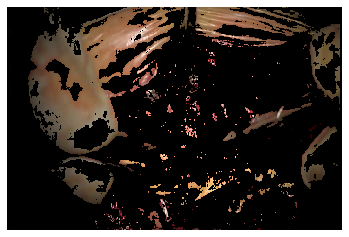

In [45]:
red_img_path = '/content/data/red_masked_img.png'
new_img = cv2.imread(red_img_path)

color_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB) 
fig, axes = plt.subplots(figsize=(6, 6))
axes.imshow(color_img)
axes.axis('off')
plt.show()

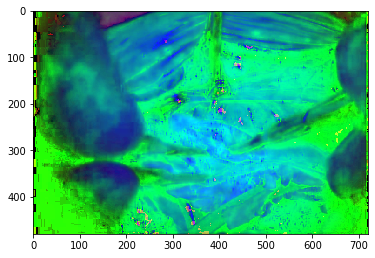

In [36]:
new_img1 = cv2.imread(img_path)


color_img1 = cv2.cvtColor(new_img1,  cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(figsize=(6, 6))
axes.imshow(color_img1)
plt.show()

# challenge to detect vessels

In [0]:
#crop_test

imgsrc_path = '/content/img_data/'
dirs = os.listdir(imgsrc_path)
print(len(dirs))

2097


In [0]:
from PIL import Image as Im
im = Im.open('/content/img_data/video_img_045700.jpg')
im_crop = im.crop((180,160,300,230))
im_crop.save('crop_test.jpg')

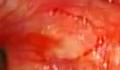

In [0]:
Image(filename='/content/crop_test.jpg')

# image migration

In [0]:
if not os.path.exists('/content/vessel'):
  os.makedirs('/content/vessel')

In [0]:
import glob
imgsrc_path = '/content/img_data'
target_dir = '/content/vessel'
img_files = glob.glob(imgsrc_path+ '/*')

for f in img_files:
  l = []
  ftitle = os.path.basename(f)[10:][:6]
  l.append(ftitle)
  if int(ftitle) >= 45000 and int(ftitle)<=50000:
    shutil.copy(f, target_dir)
  

In [0]:
from PIL import Image as Im
path = '/content/vessel/'
dirs = os.listdir( path )

def crop():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Im.open(path+item)
            f, e = os.path.splitext(path+item)
            im_crop = im.crop((180,160,300,230))
            im_crop.save(f + ' cropped.jpg',  quality=90)

crop()

In [0]:
if not os.path.exists('/content/crop'):
    os.mkdir('/content/crop')

src_dir = "/content/vessel"
dst_dir = "/content/crop"

for file in glob.iglob(os.path.join(src_dir, "*cropped.jpg")):
    shutil.copy(file, dst_dir)

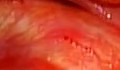

In [42]:
Image(filename='/content/crop/video_img_045900 cropped.jpg')

75 40 4 6
51 31 3 3
52 27 30 17
113 18 7 6
106 13 5 6
94 5 12 9
36 3 2 2
13 2 4 3


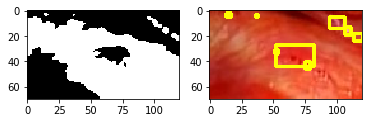

In [43]:
img_path = '/content/crop/video_img_045900 cropped.jpg'
img = cv2.imread(img_path)
 
# グレースケールにする
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
# ブラーと２値化
gray = cv2.GaussianBlur(gray,(5,5),0)
#im2 = cv2.adaptiveThreshold(gray,140,240,cv2.THRESH_BINARY+cv2.THRESH_OTSU_C,\
            #SH_BINARY)[1]
ret,im2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# 二値化した画像を左にプロット
plt.subplot(1,2,1)
plt.imshow(im2,cmap="gray")
 
#輪郭を検出
cnts = cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[1]
 
for pt in cnts:
    x,y,w,h = cv2.boundingRect(pt)
    # 幅が50以上のものをスキップ
    if w > 50:
        continue
    print(x,y,w,h)
    # 四角形を黄色で描く
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
 
# 輪郭抽出の結果を右にプロット
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

plt.show()

In [44]:
print(img.shape)

(70, 120, 3)


In [0]:
path = '/content/crop/'
dirs = os.listdir( path )

def detect_vessel():
    for item in dirs:
        if os.path.isfile(path+item):
            img = cv2.imread(path+item)
            f, e = os.path.splitext(path+item)
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            gray = cv2.GaussianBlur(gray,(5,5),0)
            ret,im2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            cnts = cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[1]
            for pt in cnts:
              x,y,w,h = cv2.boundingRect(pt)
              if w > 50:
                continue
              print(x,y,w,h)
    
              cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
              cv2.imwrite(f + 'vessel_detect.jpg', img)

In [0]:
detect_vessel()

In [0]:
if not os.path.exists('/content/detect'):
    os.mkdir('/content/detect')

src_dir = "/content/crop"
dst_dir = "/content/detect"

for file in glob.iglob(os.path.join(src_dir, "*vessel_detect.jpg")):
    shutil.copy(file, dst_dir)

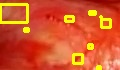

In [58]:
Image(filename='/content/detect/video_img_045800 croppedvessel_detect.jpg')

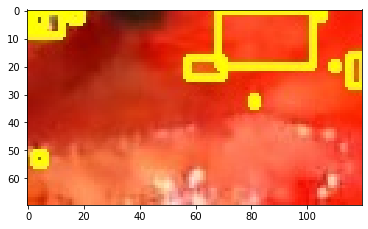

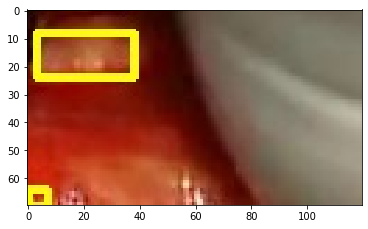

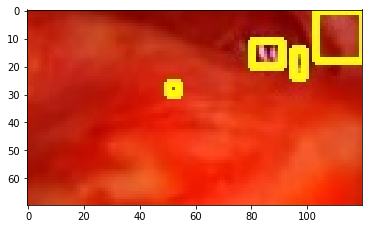

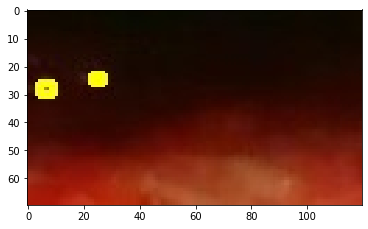

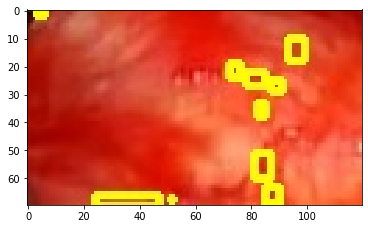

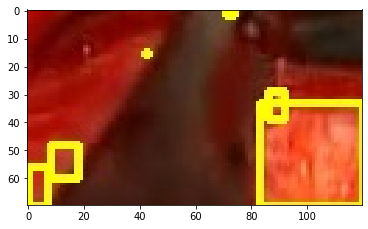

In [73]:
import random
path = '/content/detect/'
dirs = os.listdir( path )

im_num = random.sample(dirs,6)

for i in im_num:
  img = cv2.imread(path+i)
  color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  fig, axes = plt.subplots(figsize=(6, 6))
  axes.imshow(color_img)
  plt.show()